<a href="https://colab.research.google.com/github/LucasFerrSil/Fenomenos-Termicos/blob/main/FETERM_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MMQ

#Incerteza do Y:

def somav(v):
  soma = 0
  for i in range(len(v)):
      valor = 1/((v[i][1])**2)
      soma += valor
  return soma

def somx(x,y,valor):
  soma = 0
  for i in range(len(x)):
      termo = x[i][0]/((y[i][1])**2)
      soma += termo
  soma = soma/valor
  return soma

def sox2(x,y,valor):
  soma = 0
  for i in range(len(x)):
      termo = ((x[i][0])**2)/((y[i][1])**2)
      soma += termo
  soma = soma/valor
  return soma

def somay(x,y,valor):
  soma = 0
  for i in range(len(y)):
      termo = (y[i][0])/((y[i][1])**2)
      soma += termo
  soma = soma/valor
  return soma

def somaxy(x,y,valor):
  soma = 0
  for i in range(len(x)):
      termo = (x[i][0])*(y[i][0])/(y[i][1])**2
      soma += termo
  soma = soma/valor
  return soma

def a(somax,somay,somaxy,somax2,valor):
  a = ((somax*somay) - somaxy)/((somax**2) - somax2)
  t = abs(1/(valor*((somax2) - (somax**2))))
  x = [a,t**(1/2)]
  return x

def b(somay,a,somax,somax2,valor):
  b = somay - a[0]*somax
  t = abs((somax2/valor)/((somax2) - (somax**2)))
  x = [b,t**(1/2)]
  return x

def desviopadrao(vetor):
    soma = 0
    c = len(vetor)
    for i in range(c):
        soma += vetor[i][0]
    media = soma/c
    soma_dos_quadrados = 0
    for i in range(c):
        soma_dos_quadrados += (vetor[i][0] - media)**2
    desvio = (soma_dos_quadrados/(c*(c - 1)))**(1/2)
    x = [media,desvio]
    return x

def media(vetor):
    soma = 0
    for i in range(len(vetor)):
        soma += vetor[i][0]
    media = soma/len(vetor)
    soma = 0
    for i in range(len(vetor)):
        soma += (vetor[i][1]**2)
    incertezamedia = (soma**(1/2))/len(vetor)
    x = [media,incertezamedia]
    return x

In [ ]:
tr = [[23,0.5],[23,0.5],[23,0.5],[23,0.5],[23,0.5],[23,0.5],[23,0.5]]
trm = [23,0.5],[23,0.5],[23,0.5],[23,0.5],[23,0.5],[23,0.5],[23,0.5]
tamb = [26,0.7],[27,0.7]
r = [102.8,2],[102.9,2]
rm = [103,2],[103,2],[103,2],[103,2],[103,2],[103,2],[103,2]
tv = [10,4],[18,4],[24,4],[31,4],[38,4],[45,4],[52,5]
v = [-0.0007,0.0004],[-0.0003,0.0004],[0,0.0004],[0.0002,0.0004],[0.0005,0.0004],[0.0009,0.0004],[0.0012,0.0004]
c = [2],[2],[2],[2],[2],[2],[2]
import pandas as pd
dados = [ [trm[i][0] for i in range(len(trm))],
          [trm[i][1] for i in range(len(trm))],
          [rm[i][0] for i in range(len(rm))],
          [rm[i][1] for i in range(len(rm))],
          [tv[i][0] for i in range(len(tv))],
          [tv[i][1] for i in range(len(tv))],
          [v[i][0] for i in range(len(v))],
          [v[i][1] for i in range(len(v))],
          [2 for i in range(7)]]

dados = pd.DataFrame(dados)
print(dados)
dados.to_excel("dados.xlsx")


          0         1         2         3         4         5         6
0   23.0000   23.0000   23.0000   23.0000   23.0000   23.0000   23.0000
1    0.5000    0.5000    0.5000    0.5000    0.5000    0.5000    0.5000
2  103.0000  103.0000  103.0000  103.0000  103.0000  103.0000  103.0000
3    2.0000    2.0000    2.0000    2.0000    2.0000    2.0000    2.0000
4   10.0000   18.0000   24.0000   31.0000   38.0000   45.0000   52.0000
5    4.0000    4.0000    4.0000    4.0000    4.0000    4.0000    5.0000
6   -0.0007   -0.0003    0.0000    0.0002    0.0005    0.0009    0.0012
7    0.0004    0.0004    0.0004    0.0004    0.0004    0.0004    0.0004
8    2.0000    2.0000    2.0000    2.0000    2.0000    2.0000    2.0000


In [ ]:
diferenca = lambda v1,v2:[(v1[0] - v2[0]),(v1[1]**2 + v2[1]**2)**(1/2)]
elevar = lambda v,p:[v[0]**p[0],abs(p[0]*(v[0]**(p[0]-1))*v[1])]
divisao = lambda v1,v2:((v1[1]/v2[0])**2 + (v1[0]*v2[1]/(v2[0]**2))**2 )**(1/2)
potencia = lambda v2,rm:[v2[0]/rm[0],divisao(v2,rm)]
carnot = lambda tv,tr: [1 - (tv[0]/tr[0])**(-1),divisao(tr,tv)] if(tv[0] > tr[0]) else [1 - (tv[0]/tr[0]),divisao(tv,tr)]
potenciaconsumida = lambda p,e:[p[0]/e[0],divisao(p,e)]

potencia1 = list(map(potencia,list(map(elevar,v,c)),rm))
carnot1 = list(map(carnot,tv,trm))
pq = list(map(potenciaconsumida,potencia1,carnot1))
deltat = list(map(diferenca,tv,trm))

y = [[0,0.02*0],[11,0.02*11],[19,0.02*19],[33,0.02*33],[42,0.02*42],[48,0.02*48],[60,0.02*60],[69,0.02*69]]
x = [[0,0.05*0],[35/1000,0.05*35/1000],[65/1000,0.05*65/1000],[105/1000,0.05*105/1000],[140/1000,0.05*140/1000],[165/1000,0.05*165/1000],[0.2,0.05*0.2],[225/1000,0.05*225/1000]]
valor = somav(y)
somax = somx(x,y,valor)
somax2 = sox2(x,y,valor)
somay1 = somay(x,y,valor)
somaxy1 = somaxy(x,y,valor)
a1 = a(somax,somay1,somaxy1,somax2,valor)
b1 = b(somay1,a1,somax,somax2,valor)

[-15.         -14.54545455 -14.09090909 -13.63636364 -13.18181818
 -12.72727273 -12.27272727 -11.81818182 -11.36363636 -10.90909091
 -10.45454545 -10.          -9.54545455  -9.09090909  -8.63636364
  -8.18181818  -7.72727273  -7.27272727  -6.81818182  -6.36363636
  -5.90909091  -5.45454545  -5.          -4.54545455  -4.09090909
  -3.63636364  -3.18181818  -2.72727273  -2.27272727  -1.81818182
  -1.36363636  -0.90909091  -0.45454545   0.           0.45454545
   0.90909091   1.36363636   1.81818182   2.27272727   2.72727273
   3.18181818   3.63636364   4.09090909   4.54545455   5.
   5.45454545   5.90909091   6.36363636   6.81818182   7.27272727
   7.72727273   8.18181818   8.63636364   9.09090909   9.54545455
  10.          10.45454545  10.90909091  11.36363636  11.81818182
  12.27272727  12.72727273  13.18181818  13.63636364  14.09090909
  14.54545455  15.          15.45454545  15.90909091  16.36363636
  16.81818182  17.27272727  17.72727273  18.18181818  18.63636364
  19.09090909  19.

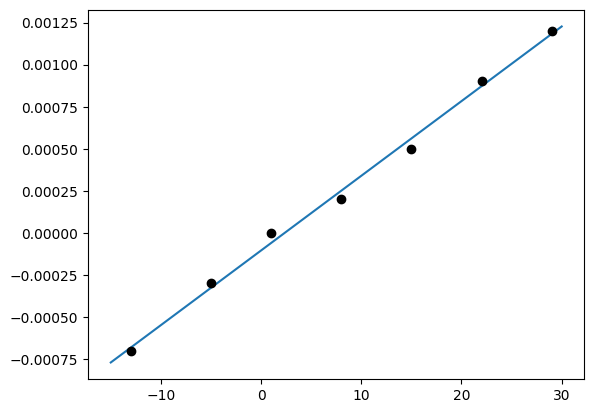

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-15,30,100)
y = []

for i in range(len(x)):
  y.append(a1[0]*x[i]+b1[0])

plt.plot(x,y)
for i in range(len(deltat)):
  plt.plot(deltat[i][0],v[i][0],'ok')

In [ ]:
y = [[0,0.01],[11,0.02*11],[19,0.02*19],[33,0.02*33],[42,0.02*42],[48,0.02*48],[60,0.02*60],[69,0.02*69]]
x = [[0,0.01],[35/1000,0.05*35/1000],[65/1000,0.05*65/1000],[105/1000,0.05*105/1000],[140/1000,0.05*140/1000],[165/1000,0.05*165/1000],[0.2,0.05*0.2],[225/1000,0.05*225/1000]]
valor = somav(y)
somax = somx(x,y,valor)
somax2 = sox2(x,y,valor)
somay1 = somay(x,y,valor)
somaxy1 = somaxy(x,y,valor)
a1 = a(somax,somay1,somaxy1,somax2,valor)
b1 = b(somay1,a1,somax,somax2,valor)

print(a1,b1)

[302.11783616438817, 2.2873043224277723] [0.0005115310137377704, 0.009994159684295725]
